In [0]:
from google.colab import files
uploaded = files.upload()
from google.colab import files
uploaded = files.upload()

Saving dog.2337.jpg to dog.2337.jpg


Saving cat.11272.jpg to cat.11272.jpg


In [0]:
!unzip data.zip

In [5]:
import tensorflow as tf
import seaborn as sns
import numpy as np

from PIL import Image
import glob
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
# 10% of the data will automatically be used for validation
IMG_SIZE = (64,64)
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 #We'll use 8192 pictures (2**13)

In [7]:
IMG_SIZE = (64,64)
def pixels_from_path(file_path):
    im = Image.open(file_path)
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    #matrix of pixel RGB values
    return np_im

In [8]:
glob.glob('data/train/*')

['data/train\\cat']

In [9]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('data/train/cat/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

0
100


In [10]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [11]:
len(glob.glob('data/train/cat/*'))

152

In [12]:
pixels_from_path(glob.glob('data/train/cat/*')[5]).shape

(64, 64, 3)

In [13]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training dog images...")
dog_train_set = np.asarray([pixels_from_path(dog) for dog in glob.glob('data/train/cat/*')[:SAMPLE_SIZE]])

loading training dog images...


In [14]:
valid_size = 38
print("loading validation dog images...")
dog_valid_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('data/validation/cat/*')[-valid_size:]])


loading validation dog images...


In [15]:
x_train = np.concatenate([dog_train_set])
#labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)])
print(labels_train.shape)

(152,)


In [16]:
x_valid = np.concatenate([ dog_valid_set])
labels_valid = np.asarray([1 for _ in range(valid_size)])
print(labels_valid.shape)

(38,)


In [17]:
x_train.shape

(152, 64, 64, 3)

In [18]:
labels_train.shape

(152,)

In [19]:
labels_valid.shape

(38,)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

total_pixels = img_size[0] *img_size[1] * 3
fc_size = 512

inputs = keras.Input(shape=(img_size[1], img_size[0],3), name='ani_image')
x = layers.Flatten(name = 'flattened_img')(inputs) #turn image to vector.

x = layers.Dense(fc_size, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#model2=Sequential()
input_shape=(64,64,3)
import tensorflow as tf
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2)
    # Flatten the results to feed into a DNN
    #tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    #tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [22]:
shape_counts = defaultdict(int)
for i, cat in enumerate(glob.glob('/data/train1/dog/*')[:1000]):
    if i%100==0:
        print(i)
    img_shape = pixels_from_path(cat).shape
    shape_counts[str(img_shape)]= shape_counts[str(img_shape)]+ 1

In [23]:
shape_items = list(shape_counts.items())
shape_items.sort(key = lambda x: x[1])
shape_items.reverse()

In [24]:
validation_size = 0.1
img_size = IMG_SIZE # resize images to be 374x500 (most common shape)
num_channels = 3 # RGB
sample_size = 8192 

In [25]:
len(glob.glob('data/train1/dog/*'))

152

In [26]:
pixels_from_path(glob.glob('data/train1/dog/*')[5]).shape

(64, 64, 3)

In [27]:
SAMPLE_SIZE = 152
#print("loading trainin cat images...")
#cat_train_set = np.asarray([pixels_from_path(cat) for cat in glob.glob('/home/apiiit-rkv/Desktop/tot/tottrain/horse/*')[:SAMPLE_SIZE]])
print("loading training horseimages...")
horse_train_set = np.asarray([pixels_from_path(horse) for horse in glob.glob('data/train1/dog/*')[:SAMPLE_SIZE]])

loading training horseimages...


In [28]:
valid_size = 38
print("loading validation horseimages...")
horse_valid_set = np.asarray([pixels_from_path(horse) for horse in glob.glob('data/validation1/dog/*')[-valid_size:]])


loading validation horseimages...


In [29]:
x_train1 = np.concatenate([horse_train_set])
#labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
labels_train1 = np.asarray([0 for _ in range(SAMPLE_SIZE)])
print(labels_train1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [30]:
x_valid1 = np.concatenate([ horse_valid_set])
labels_valid1 = np.asarray([0 for _ in range(valid_size)])
print(labels_valid1.shape)
print(labels_valid1)

(38,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#model1=Sequential()
import tensorflow as tf
input_shape=(64,64,3)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2)
])


In [32]:
import keras
print(keras.__version__)
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input

2.3.1


Using TensorFlow backend.


In [33]:
model_concat = concatenate([model1.output, model2.output], axis=-1)

In [34]:
model_concat= Flatten()(model_concat)
model_concat = Dense(2, activation='softmax')(model_concat)
model = Model(inputs=[model1.input, model2.input], outputs=model_concat)

In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_4_input (InputLayer)     [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_input (InputLayer)       [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 62, 62, 16)   448         conv2d_4_input[0][0]             
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 62, 62, 16)   448         conv2d_input[0][0]               
____________________________________________________________________________________________

In [37]:
print(labels_train)
print(labels_valid)
print(labels_train1)
print(labels_valid1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [38]:
from numpy  import *   
out_u=matrix(np.zeros(120))
out_sig=matrix(np.ones(120))
out_both = concatenate([out_u, out_sig], axis=1)
print(out_both)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [39]:
SAMPLE_SIZE=76
labels_train = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
print(labels_train.shape)
print(labels_train)

(152,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [40]:
labels_train.shape

(152,)

In [41]:
SAMPLE_SIZE=19
labels_valid = np.asarray([1 for _ in range(SAMPLE_SIZE)]+[0 for _ in range(SAMPLE_SIZE)])
print(labels_valid)

print(labels_valid.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
(38,)


In [42]:
epoch=10
history = model.fit([x_train,x_train1],
                    [labels_train],
                    shuffle = True, #important since we loaded cats first, dogs second.
                    epochs=10,
                    validation_data=([x_valid,x_valid1], 
                                     [labels_valid]))


Train on 152 samples, validate on 38 samples
Epoch 1/10
152/152 [==============================] - 3s 20ms/sample - loss: 28.3901 - accuracy: 0.5395 - val_loss: 15.0687 - val_accuracy: 0.5000
Epoch 2/10
152/152 [==============================] - 0s 3ms/sample - loss: 7.0804 - accuracy: 0.5395 - val_loss: 2.9134 - val_accuracy: 0.4737
Epoch 3/10
152/152 [==============================] - 0s 3ms/sample - loss: 1.9273 - accuracy: 0.5855 - val_loss: 2.7143 - val_accuracy: 0.4737
Epoch 4/10
152/152 [==============================] - 0s 3ms/sample - loss: 0.9968 - accuracy: 0.6118 - val_loss: 0.8855 - val_accuracy: 0.5000
Epoch 5/10
152/152 [==============================] - 0s 3ms/sample - loss: 0.5745 - accuracy: 0.7039 - val_loss: 1.3837 - val_accuracy: 0.4737
Epoch 6/10
152/152 [==============================] - 0s 3ms/sample - loss: 0.4131 - accuracy: 0.7632 - val_loss: 0.8541 - val_accuracy: 0.5263
Epoch 7/10
152/152 [==============================] - 0s 3ms/sample - loss: 0.3234 - acc

In [43]:
import cv2
imgcat = cv2.imread('data1/train/cat/cat.14.jpg') 
imgdog = cv2.imread('data1/train1/dog/dog.2351.jpg')
imgcat  = cv2.resize(imgcat, (64, 64))
fin = np.float32(imgcat).reshape(1, 64, 64, 3)
imgdog  = cv2.resize(imgdog, (64, 64))
fin1 = np.float32(imgdog).reshape(1, 64, 64, 3)

In [44]:
prediction=model.predict([fin, fin1], batch_size=None,steps=1)
prediction

array([[0.26313838, 0.7368615 ]], dtype=float32)

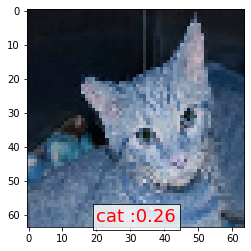

In [45]:
import matplotlib.pyplot as plt
if(prediction[:,:]>0.5).any():
    value ='cat :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='dog :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(imgcat)
plt.show()

In [0]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import files
#uploaded = files.upload()
from google.colab import files
#uploaded = files.upload()


for fn in uploaded.keys():
 
  # predicting images
  classes = model.predict([imgdog,imgcat])
  print(classes)
  print(classes[0,0])
  if classes[0,0]>0.5:
    print(fn + " is a  cat")
  else:
    print(fn + " is a dog")

[[0.03022327 0.9697768 ]]
0.030223267
cat.11272.jpg is a dog


Text(0.5, 1.0, 'Training and validation loss')

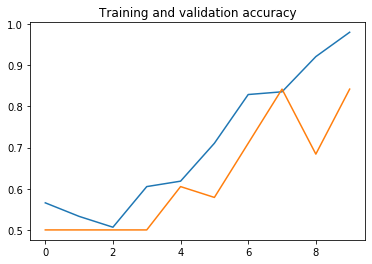

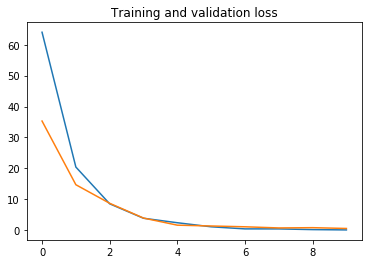

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [0]:
import os
base_dir = 'data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train1_dir = os.path.join(base_dir, 'train1')
validation1_dir = os.path.join(base_dir, 'validation1')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cat')
train_dogs_dir = os.path.join(train1_dir, 'dog')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cat')
validation_dogs_dir = os.path.join(validation1_dir, 'dog')


In [0]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.146.jpg', 'cat.30.jpg', 'cat.83.jpg', 'cat.49.jpg', 'cat.57.jpg', 'cat.23.jpg', 'cat.2.jpg', 'cat.127.jpg', 'cat.126.jpg', 'cat.130.jpg']
['dog.2420.jpg', 'dog.2468.jpg', 'dog.2381.jpg', 'dog.2330.jpg', 'dog.2397.jpg', 'dog.2434.jpg', 'dog.2366.jpg', 'dog.2354.jpg', 'dog.2392.jpg', 'dog.2343.jpg']


In [0]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 152
total training dog images : 152
total validation cat images : 38
total validation dog images : 38


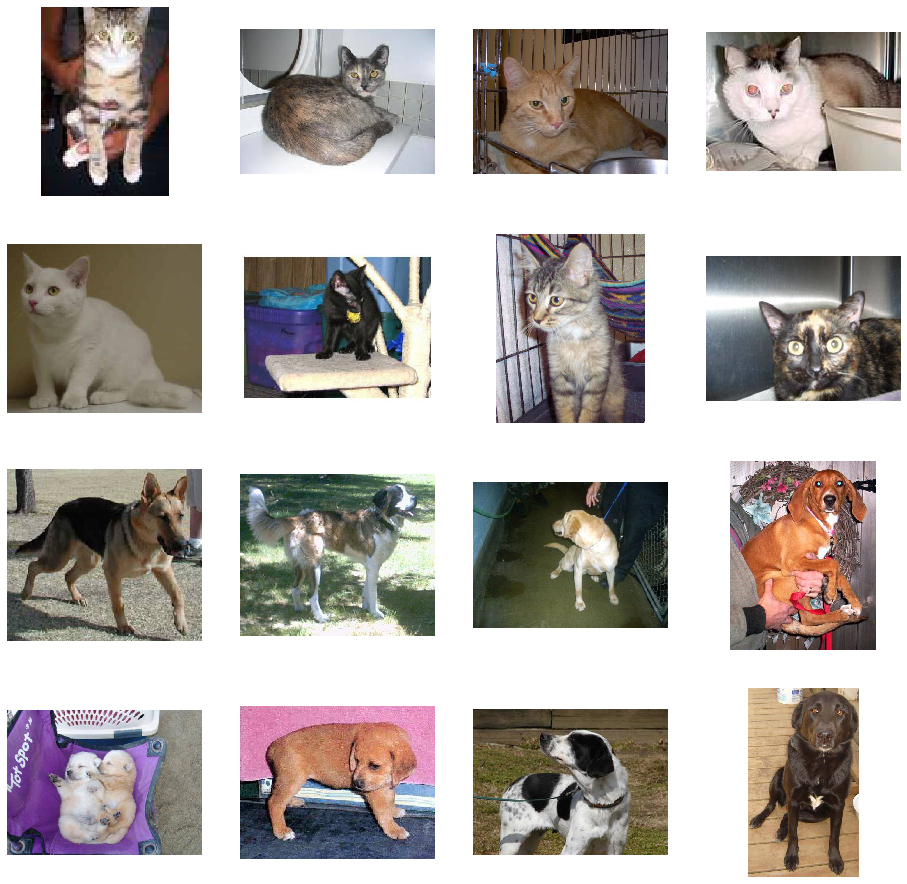

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
model